In [1]:
# Importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
# Let us now go ahead and read the dataset and check the frist 5 rows of the dataset

company = pd.read_csv('Company data.csv')
company.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          3541 non-null   int64  
 1   Networth Next Year                           3541 non-null   float64
 2   Total assets                                 3541 non-null   float64
 3   Net worth                                    3541 non-null   float64
 4   Total income                                 3343 non-null   float64
 5   Change in stock                              3083 non-null   float64
 6   Total expenses                               3402 non-null   float64
 7   Profit after tax                             3410 non-null   float64
 8   PBDITA                                       3410 non-null   float64
 9   PBT                                          3410 non-null   float64
 10  

In [5]:
# Fixing messy column names (containing spaces) for ease of use

company.columns = company.columns.str.replace(' ','_').str.replace('(','').str.replace(')','').str.replace('%','perc').str.replace('/','_to_')

In [6]:
company.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income',
       'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Sales', 'Income_from_financial_services', 'Other_income',
       'Total_capital', 'Reserves_and_funds',
       'Deposits_accepted_by_commercial_banks', 'Borrowings',
       'Current_liabilities_&_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_tim

In [7]:
print("The num of rows (observation) is", company.shape[0], '\n', 'The num of columns (variables) is', company.shape[1])

The num of rows (observation) is 3541 
 The num of columns (variables) is 52


In [8]:
company.shape

(3541, 52)

In [9]:
# Now, let us check the basis measures of descriptive statistics for the continuous variable
company.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,3541.000000,3541.000000,3.541000e+03,3541.000000,3.343000e+03,3083.000000,3.402000e+03,3410.00000,3410.000000,3410.000000,...,3213.000000,2801.000000,2901.000000,3180.000000,2.849000e+03,2849.000000,3541.000000,3541.000000,3.541000e+03,1347.000000
mean,1772.451567,1616.256199,3.443382e+03,1295.862214,4.582823e+03,41.489264,4.262931e+03,277.36044,578.056305,383.810088,...,17.041261,87.078725,27.930469,19.088399,2.206739e+07,-1333.698175,-220.316436,-221.512285,3.443382e+03,63.905687
std,1023.731393,17459.639673,3.097089e+04,13387.891867,5.568124e+04,440.573761,5.302869e+04,3064.40606,5653.770427,4117.069953,...,83.943754,598.545835,151.042868,376.340737,1.655193e+08,37500.729972,14261.946209,14261.923760,3.097089e+04,1433.809532
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.30000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,886.000000,31.700000,9.130000e+01,31.300000,1.064500e+02,-1.800000,9.582500e+01,0.50000,6.900000,0.700000,...,3.760000,8.200000,5.100000,2.990000,1.316250e+06,10.000000,0.000000,0.000000,9.130000e+01,3.275000
50%,1773.000000,116.300000,3.097000e+02,102.300000,4.449000e+02,1.600000,4.077000e+02,8.80000,35.400000,12.400000,...,6.320000,17.270000,9.760000,6.400000,4.672063e+06,10.000000,1.430000,1.180000,3.097000e+02,9.100000
75%,2658.000000,456.100000,1.098700e+03,377.300000,1.440900e+03,18.050000,1.359775e+03,52.27500,150.250000,71.975000,...,11.680000,40.350000,20.240000,11.845000,1.065197e+07,10.000000,9.620000,7.480000,1.098700e+03,17.790000
max,3545.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.10000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


In [10]:
# Creating a binary target variable using "Networth_Next_Year"

company['default'] = np.where((company['Networth_Next_Year']>0),1,0)

In [11]:
company.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31,1
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17,1
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76,1
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN,1
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN,1


In [12]:
company[['default','Networth_Next_Year']].head(20)

,default,Networth_Next_Year
0,1,8890.6
1,1,394.3
2,1,92.2
3,1,2.7
4,1,109.0
5,1,688.6
6,1,246.0
7,1,13.7
8,1,291.5
9,0,-7.3


In [13]:
company['default'].value_counts()

1    3298
0     243
Name: default, dtype: int64

In [14]:
company['default'].value_counts(normalize=True)

1    0.931375
0    0.068625
Name: default, dtype: float64

In [15]:
company.isnull().sum()

Num                                                  0
Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       198
Change_in_stock                                    458
Total_expenses                                     139
Profit_after_tax                                   131
PBDITA                                             131
PBT                                                131
Cash_profit                                        131
PBDITA_as_perc_of_total_income                      68
PBT_as_perc_of_total_income                         68
PAT_as_perc_of_total_income                         68
Cash_profit_as_perc_of_total_income                 68
PAT_as_perc_of_net_worth                             0
Sales                                              259
Income_from_financial_services                     935
Other_inco

In [18]:
company.shape

(3541, 53)

In [19]:
3541*53

187673

In [16]:
company.size

187673

In [17]:
company.isnull().sum().sum()

18533

In [20]:
company_x = company.drop('default', axis=1)
company_y = company['default']

In [21]:
company_x.head(2)

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17


In [23]:
company_x.duplicated().sum()

0

In [22]:
company_y.head(2)

0    1
1    1
Name: default, dtype: int32

In [ ]:
# handling missing value - required
# encoding - not required
# outlier treatment - required
# feature scaling - required
# imbalance treatment - required

In [24]:
# Let's check the number of outliers per columns

Q1 = company_x.quantile(0.25)
Q3 = company_x.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

In [32]:
((company_x > UL) | (company_x < LL)).sum()

Num                                                 0
Networth_Next_Year                                506
Total_assets                                      484
Net_worth                                         499
Total_income                                      427
Change_in_stock                                   621
Total_expenses                                    432
Profit_after_tax                                  577
PBDITA                                            483
PBT                                               576
Cash_profit                                       515
PBDITA_as_perc_of_total_income                    287
PBT_as_perc_of_total_income                       453
PAT_as_perc_of_total_income                       502
Cash_profit_as_perc_of_total_income               353
PAT_as_perc_of_net_worth                          344
Sales                                             418
Income_from_financial_services                    432
Other_income                

In [36]:
company_x[((company_x > UL) | (company_x < LL))] = np.nan

In [37]:
company_x.isnull().sum()

Num                                                  0
Networth_Next_Year                                 506
Total_assets                                       484
Net_worth                                          499
Total_income                                       625
Change_in_stock                                   1079
Total_expenses                                     571
Profit_after_tax                                   708
PBDITA                                             614
PBT                                                707
Cash_profit                                        646
PBDITA_as_perc_of_total_income                     355
PBT_as_perc_of_total_income                        521
PAT_as_perc_of_total_income                        570
Cash_profit_as_perc_of_total_income                421
PAT_as_perc_of_net_worth                           344
Sales                                              677
Income_from_financial_services                    1367
Other_inco

In [38]:
((company_x > UL) | (company_x < LL)).sum()

Num                                               0
Networth_Next_Year                                0
Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_financial_services                    0
Other_income                                      0
Total_capita

In [39]:
company_x.isnull().sum().sum()

39981

In [40]:
company_x.isnull().sum()/len(company_x)*100

Num                                                 0.000000
Networth_Next_Year                                 14.289749
Total_assets                                       13.668455
Net_worth                                          14.092064
Total_income                                       17.650381
Change_in_stock                                    30.471618
Total_expenses                                     16.125388
Profit_after_tax                                   19.994352
PBDITA                                             17.339735
PBT                                                19.966111
Cash_profit                                        18.243434
PBDITA_as_perc_of_total_income                     10.025417
PBT_as_perc_of_total_income                        14.713358
PAT_as_perc_of_total_income                        16.097148
Cash_profit_as_perc_of_total_income                11.889297
PAT_as_perc_of_net_worth                            9.714770
Sales                   

In [41]:
company_x = company_x.drop(['Num','Networth_Next_Year'], axis=1)

In [42]:
company_x.shape

(3541, 50)

In [43]:
company_sub1 = pd.concat([company_x, company_y], axis=1)

In [44]:
company_sub1.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.46,...,NaN,21.78,7.71,NaN,10.0,NaN,7.10,NaN,27.31,1
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,NaN,158.6,18.53,...,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17,1
2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,0.3,1.22,...,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76,1
3,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN,1
4,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,11.9,1.96,...,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN,1


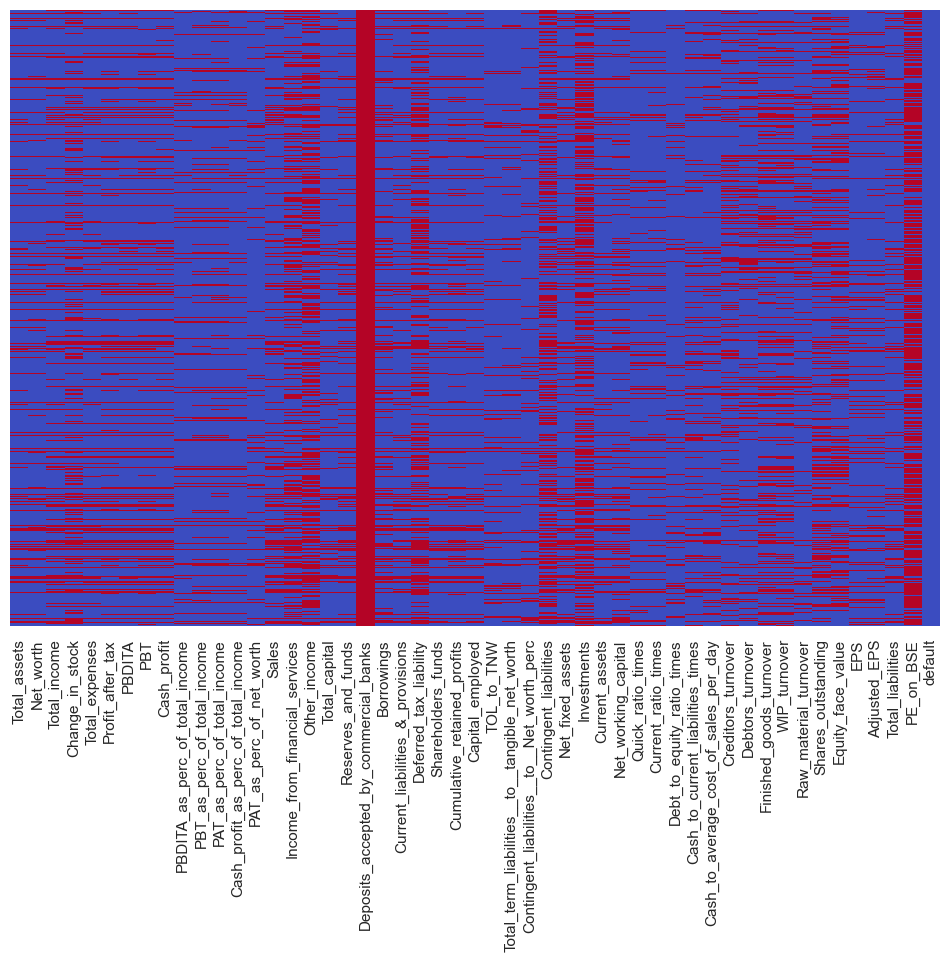

In [45]:
# Let's visually inspect the missing values in our data

plt.figure(figsize=(12,8))
sns.heatmap(company_sub1.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.show()

In [46]:
# we should inspect total missing values by each row
company_sub1.isnull().sum(axis=1)

0       30
1        3
2        3
3       23
4        3
        ..
3536     5
3537     7
3538     2
3539     7
3540    22
Length: 3541, dtype: int64

In [47]:
company_sub1.shape

(3541, 51)

In [57]:
51*0.15

7.6499999999999995

In [58]:
company_sub1_temp = company_sub1[company_sub1.isnull().sum(axis=1) <=7]

In [59]:
3541 - 2396

1145

In [60]:
1145/3541*100

32.33549844676645

In [61]:
company_sub1_temp.shape

(1527, 51)

In [54]:
company_sub1_temp['default'].value_counts(normalize=True)

1    0.961603
0    0.038397
Name: default, dtype: float64

In [62]:
company_sub1.shape

(3541, 51)

In [64]:
company_sub1.isnull().sum().sort_values(ascending=False)/len(company_sub1)*100

Deposits_accepted_by_commercial_banks             100.000000
PE_on_BSE                                          67.636261
Investments                                        50.833098
Other_income                                       45.523863
Contingent_liabilities                             42.784524
Deferred_tax_liability                             41.541937
Income_from_financial_services                     38.604914
Equity_face_value                                  31.855408
Shares_outstanding                                 30.641062
Change_in_stock                                    30.471618
Finished_goods_turnover                            30.104490
WIP_turnover                                       26.998023
Borrowings                                         22.536007
Profit_after_tax                                   19.994352
PBT                                                19.966111
Net_working_capital                                19.881389
Creditors_turnover      

In [65]:
# Dropping columns with more than 25% missing value
company_sub2 = company_sub1.drop(['Deposits_accepted_by_commercial_banks','PE_on_BSE','Investments','Other_income',
                                 'Contingent_liabilities','Deferred_tax_liability','Income_from_financial_services',
                                 'Equity_face_value','Shares_outstanding','Change_in_stock','Finished_goods_turnover',
                                 'WIP_turnover'], axis=1)

In [66]:
company_sub2.shape

(3541, 39)

In [68]:
# Segregate the predictors and response
predictors = company_sub2.drop('default', axis=1)
response = company_sub2['default']

In [69]:
predictors.head()

,Total_assets,Net_worth,Total_income,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,...,Current_ratio_times,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Raw_material_turnover,EPS,Adjusted_EPS,Total_liabilities
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.46,9.68,...,1.37,0.00,0.43,NaN,3.62,3.85,7.71,NaN,7.10,NaN
1,941.0,351.5,1527.4,1454.9,115.2,283.0,NaN,158.6,18.53,12.33,...,1.56,0.78,0.06,5.96,9.80,5.70,11.46,9.97,9.97,941.0
2,232.8,100.6,477.3,478.7,-6.6,5.8,-6.6,0.3,1.22,-1.38,...,1.55,0.35,0.21,17.07,5.28,5.07,NaN,-0.50,-0.50,232.8
3,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,...,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,2.7
4,478.5,107.6,1580.5,1558.0,5.5,31.0,6.3,11.9,1.96,0.40,...,2.54,1.79,0.00,0.00,13.00,9.46,17.03,7.91,7.91,478.5


In [70]:
response

0       1
1       1
2       1
3       1
4       1
       ..
3536    1
3537    1
3538    1
3539    1
3540    0
Name: default, Length: 3541, dtype: int32

In [71]:
# Scale the predictors

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictor = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

In [72]:
company_sub3 = pd.concat([scaled_predictor, response], axis=1)

In [74]:
company_sub3.head()

,Total_assets,Net_worth,Total_income,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,...,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Raw_material_turnover,EPS,Adjusted_EPS,Total_liabilities,default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127839,0.908824,...,-1.011791,3.600075,NaN,-0.616560,-0.597170,0.105724,NaN,1.046657,NaN,1
1,0.857364,1.040021,1.169560,1.187136,3.369301,2.796202,NaN,2.463083,1.046692,1.384031,...,-0.164137,-0.295625,-0.375425,0.639601,-0.232877,0.744868,1.165458,1.675933,0.857364,1
2,-0.409188,-0.276449,-0.203697,-0.161047,-0.765968,-0.644752,-0.716398,-0.639534,-1.203003,-1.074495,...,-0.631434,1.283713,0.670245,-0.279145,-0.356933,NaN,-0.607066,-0.619719,-0.409188,1
3,-0.820702,-0.790130,NaN,NaN,NaN,NaN,NaN,NaN,-1.361560,-0.827028,...,-1.011791,NaN,NaN,-1.352370,-1.355293,-1.208357,-0.522419,-0.510089,-0.820702,1
4,0.030224,-0.239720,1.239001,1.329523,-0.355157,-0.331938,-0.394099,-0.412179,-1.106829,-0.755299,...,0.933466,-0.927360,-0.936379,1.290041,0.507524,1.694209,0.816709,1.224258,0.030224,1


# Imputing the remaining missing value

In [76]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
company_imputed = pd.DataFrame(imputer.fit_transform(company_sub3), columns=company_sub3.columns)

In [77]:
company_imputed.isnull().sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liabilities_&_provisions                  0
Shareholders_funds                                0
Cumulative_r

In [78]:
company_imputed.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
3536    0
3537    0
3538    0
3539    0
3540    0
Length: 3541, dtype: int64